In [96]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [97]:
data = pd.read_csv('train.csv')

In [98]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T # transposing the matrix and creating dev data sets
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255. # normalizing the data set

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [100]:
Y_train

array([7, 9, 9, ..., 5, 3, 6])

In [101]:
def init_params(): # initializing parameters and centering towards zero
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z): # defining non-linear activation function
    return np.maximum(0, Z)

def softmax(Z): # activation function for output layer, prob. distribution
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def forward_prop(W1, b1, W2, b2, X): # running through nn from input to output
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y): # representing number labels in a numerical format
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z): #used to compute gradient of loss function
    return Z > 0

def back_prop(Z1, A1, A2, W2, X, Y, m): # computing gradients of the loss function to finetune weights
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, 1)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, 1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha): #updating weights and biases
    W1 -= alpha * dW1
    b1 -= alpha * np.reshape(db1, (10,1))
    W2 -= alpha * dW2
    b2 -= alpha * np.reshape(db2, (10,1))
    return W1, b1, W2, b2




In [102]:
def get_predictions(A2): # grabbing corresponding index value 
    return np.argmax(A2,0)

def get_accuracy(predictions, Y): # accurracy of model
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha): # running the neural network
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, A2, W2, X, Y, m)
        # updating weights
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i % 10 == 0):
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [103]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1) #running at 500 iterations and 0.1 learning rate

Iteration:  0
[7 0 1 ... 1 1 1] [7 9 9 ... 5 3 6]
Accuracy:  0.1243170731707317
Iteration:  10
[7 0 8 ... 0 5 5] [7 9 9 ... 5 3 6]
Accuracy:  0.2065121951219512
Iteration:  20
[7 0 0 ... 0 5 5] [7 9 9 ... 5 3 6]
Accuracy:  0.2954390243902439
Iteration:  30
[7 0 0 ... 0 8 5] [7 9 9 ... 5 3 6]
Accuracy:  0.3564390243902439
Iteration:  40
[7 0 0 ... 0 8 0] [7 9 9 ... 5 3 6]
Accuracy:  0.4156341463414634
Iteration:  50
[9 0 0 ... 0 8 2] [7 9 9 ... 5 3 6]
Accuracy:  0.46985365853658534
Iteration:  60
[9 0 0 ... 0 8 6] [7 9 9 ... 5 3 6]
Accuracy:  0.5219512195121951
Iteration:  70
[9 5 8 ... 0 8 6] [7 9 9 ... 5 3 6]
Accuracy:  0.5653170731707317
Iteration:  80
[9 5 6 ... 5 8 6] [7 9 9 ... 5 3 6]
Accuracy:  0.6036585365853658
Iteration:  90
[9 5 6 ... 5 8 6] [7 9 9 ... 5 3 6]
Accuracy:  0.6334878048780488
Iteration:  100
[9 5 6 ... 5 8 6] [7 9 9 ... 5 3 6]
Accuracy:  0.6593170731707317
Iteration:  110
[7 5 6 ... 5 3 6] [7 9 9 ... 5 3 6]
Accuracy:  0.6823902439024391
Iteration:  120
[7 5 6 ...

In [104]:
def make_predictions(X, W1, b1, W2, b2): # getting predictions of the model
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2): # showing true label and image of label
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


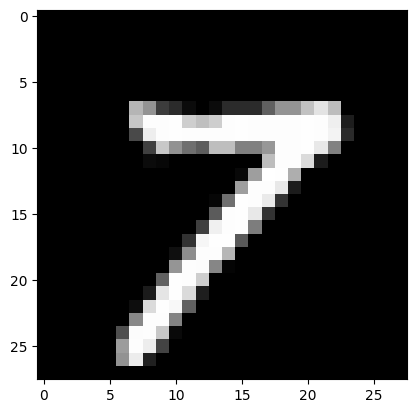

Prediction:  [5]
Label:  9


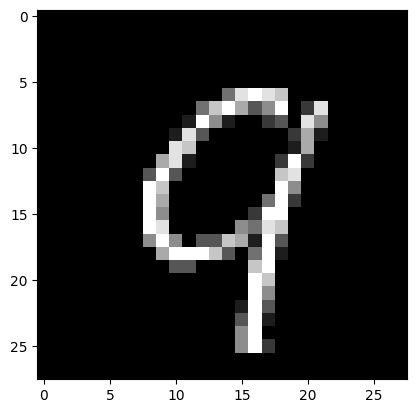

Prediction:  [0]
Label:  9


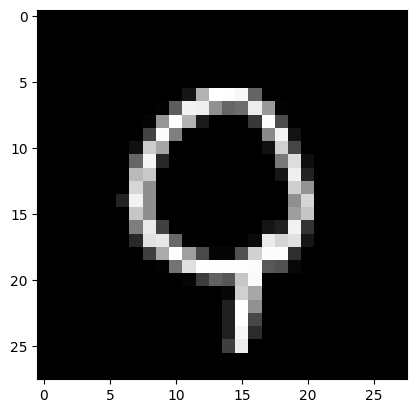

Prediction:  [8]
Label:  8


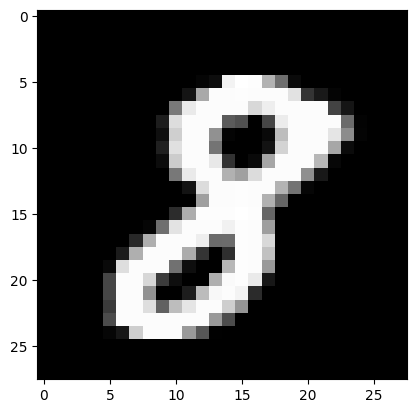

In [105]:
test_prediction(0, W1, b1, W2, b2) # testing at diff indexes
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [106]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev) # checking on training data to compare results

[0 4 6 1 2 2 5 9 9 1 3 4 7 6 1 4 5 1 1 4 3 7 6 8 2 6 6 3 5 0 2 0 4 9 7 8 8
 8 3 4 2 6 2 4 3 3 0 9 0 2 4 1 3 5 0 9 2 4 3 6 8 2 7 0 7 5 0 2 4 2 7 8 8 5
 5 5 2 3 3 6 7 0 7 5 9 6 9 1 9 1 5 3 1 9 1 7 5 2 2 6 7 2 0 2 5 5 5 8 6 1 2
 2 6 5 5 8 9 0 4 7 1 9 3 4 8 3 3 8 2 3 0 3 2 9 0 9 9 4 8 9 2 3 2 8 1 2 6 2
 2 4 1 5 4 2 7 2 3 9 2 9 7 9 2 3 2 7 7 6 8 0 0 6 7 5 8 1 0 1 7 6 3 9 9 3 0
 1 3 6 7 3 6 5 1 0 0 4 3 6 6 9 5 5 7 2 0 2 4 9 0 9 0 0 0 5 8 3 0 5 7 9 8 5
 4 6 2 2 6 4 3 3 1 4 8 2 2 9 4 5 3 5 3 8 4 0 9 6 8 6 7 2 6 1 9 3 7 6 6 3 7
 1 8 0 6 8 4 4 7 0 1 7 6 8 1 6 1 0 7 1 9 8 7 5 9 7 3 8 9 4 2 5 3 8 1 4 3 2
 6 7 9 0 0 4 6 9 9 7 2 1 9 7 3 7 9 7 0 0 7 8 4 4 5 6 2 4 0 4 5 1 2 6 6 9 6
 6 1 3 1 9 0 8 4 1 6 0 6 2 0 6 4 8 6 0 3 8 3 0 9 1 0 6 0 6 1 3 6 2 1 1 9 9
 1 0 1 1 8 0 7 7 2 0 4 0 7 9 3 8 2 4 8 6 4 4 4 8 4 3 8 0 1 9 0 8 6 8 7 6 8
 3 9 4 8 9 1 8 1 2 1 1 2 6 9 7 7 1 3 1 5 6 7 9 4 1 4 7 9 3 4 6 5 1 6 6 9 1
 5 0 9 8 3 0 3 9 5 5 8 0 0 1 4 9 2 3 1 0 1 4 6 2 9 8 0 2 0 1 6 0 8 5 6 6 5
 6 8 6 0 5 1 9 3 9 3 3 6 

0.855